In [ ]:
%autosave 60
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

Autosaving every 60 seconds


# New Section

In [ ]:
heart_df = pd.read_csv("framingham.csv")

In [ ]:
# all columns
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# dropping education column not necessary
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# sum of nulls in each column
num_nulls = heart_df.isna().sum()
print(num_nulls)

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# drop all the rows with null cells
heart_df.dropna(axis=0, inplace=True)
print(heart_df.isna().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


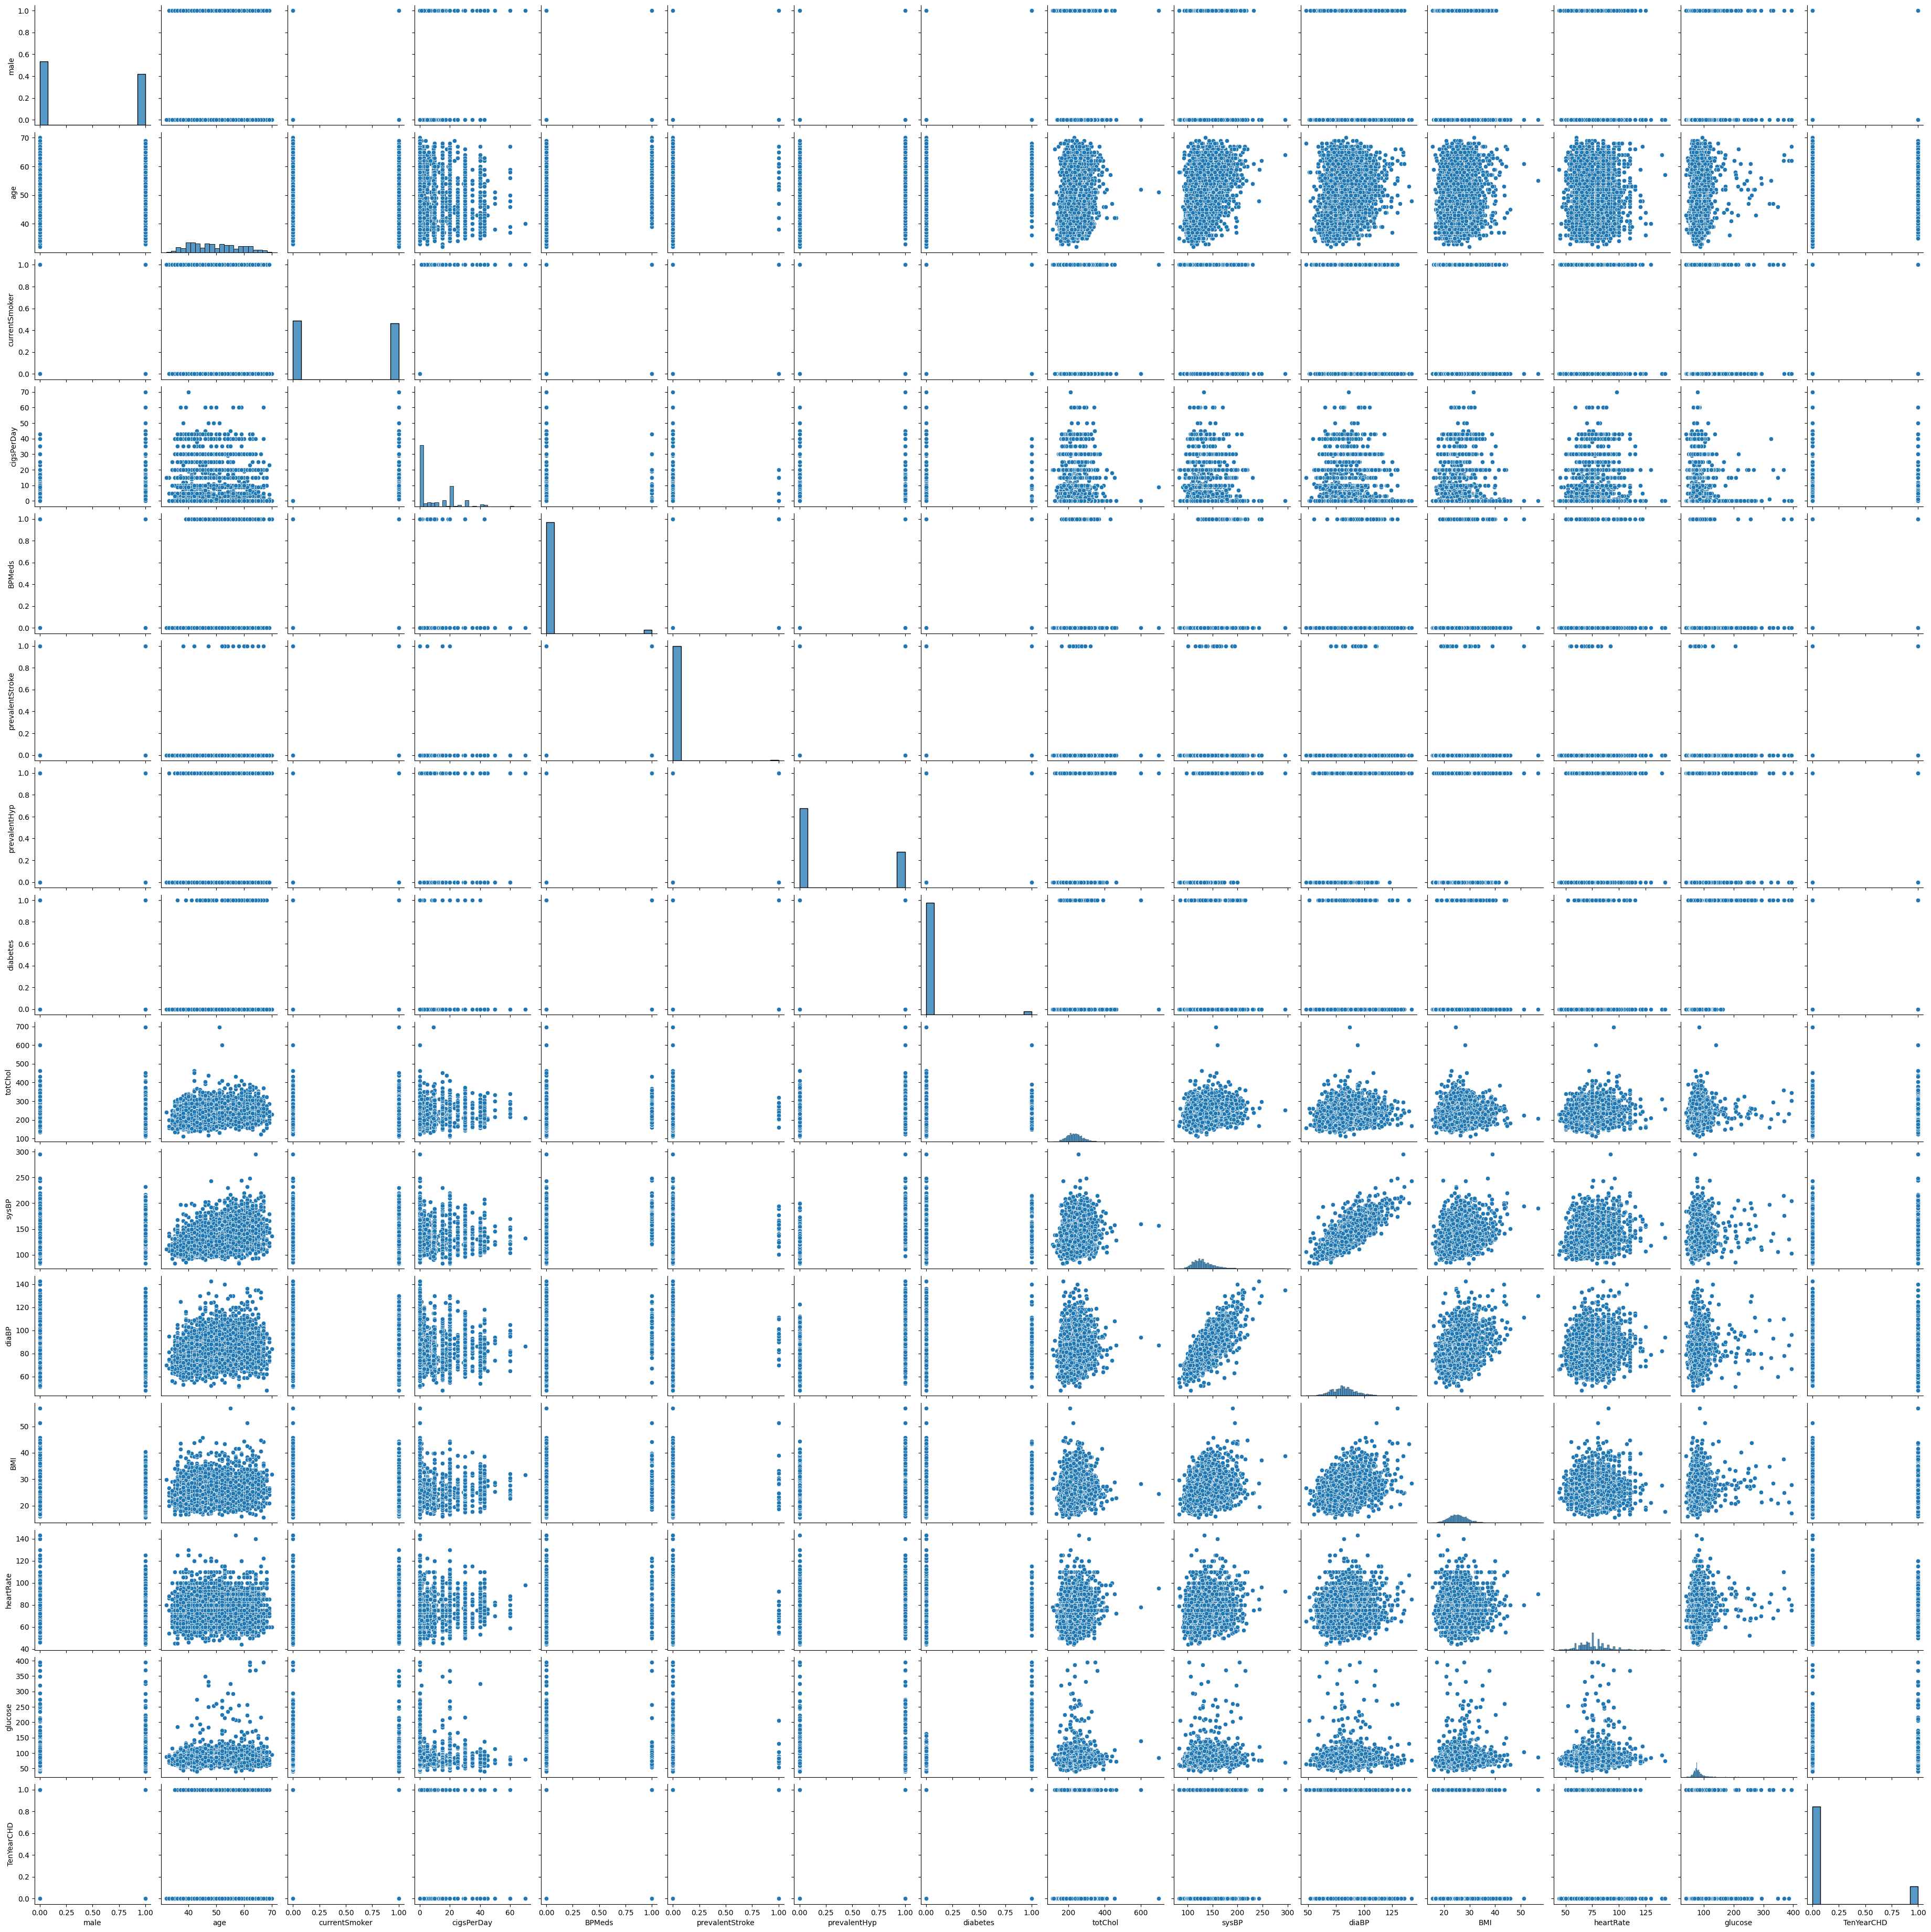

In [ ]:
sn.pairplot(heart_df)

In [ ]:
# checks total of 0's and 1's in the target column
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

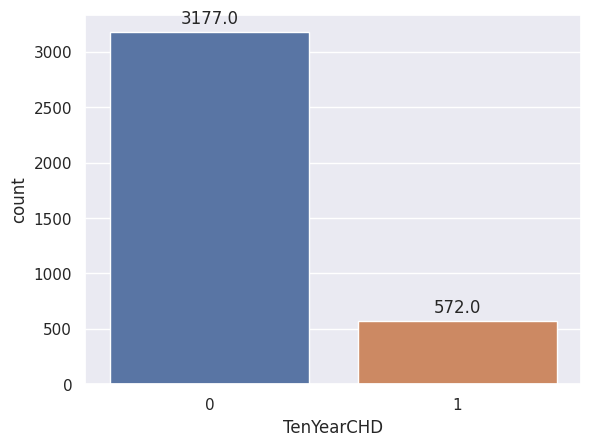

In [ ]:
# Create the countplot
sn.set(style="darkgrid")
ax = sn.countplot(x='TenYearCHD', data=heart_df)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# as shown below we can see that 3177 patients had no heart disease
# and 572 patients with risk of heart disease

<Axes: >

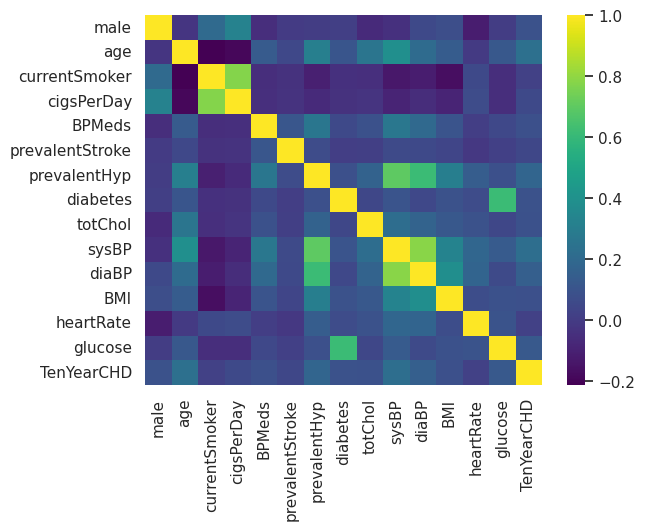

In [ ]:
sn.heatmap(heart_df.corr(), cmap="viridis")

In [ ]:
df = pd.DataFrame(heart_df)

In [ ]:
# Split the data into features (X) and target (y)
X = heart_df.drop('TenYearCHD', axis=1)
y = heart_df['TenYearCHD']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [ ]:
# Logistic Regression Model
logisticRegr = LogisticRegression(solver='liblinear', max_iter=1000)
logisticRegr.fit(X_train, y_train)

# Predictions on the test set
y_pred = logisticRegr.predict(X_test)

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Extracting Sensitivity, Specificity, and F1 Score from the classification report
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Precision: [0.85945946 0.63636364]
Recall: [0.99375    0.06306306]
F1 Score: [0.92173913 0.1147541 ]
Support: [640 111]


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       640
           1       0.64      0.06      0.11       111

    accuracy                           0.86       751
   macro avg       0.75      0.53      0.52       751
weighted avg       0.83      0.86      0.80       751



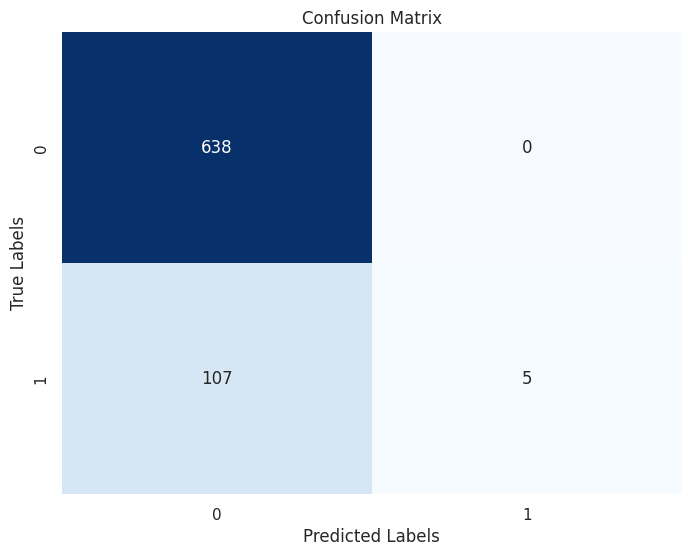

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()